RFM: Recency - Frequency - Monetary Value.
- Low value: Customers who are less active than others, not very frequent vistor, maybe negative revenue
- Mid value: Middle of something. Often use platform, fairly frequent, generate moderate revenue
- High value: High revenue, frequency and high activity.
Segmentation users base on these types of 
1. Recency: based on the last active order -> Clustering
2. Frequency: based on total number orders for each customer -> Clustering
3. Revenue: based on total revenue -> Clustering

# Import Libraries

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
olist_customers = pd.read_csv("/Users/phuongnguyen/Documents/Code Github/mlops-ml-ecommerce-customers/sample_files/olist_dataset/olist_customers_dataset.csv")
olist_orders = pd.read_csv("/Users/phuongnguyen/Documents/Code Github/mlops-ml-ecommerce-customers/sample_files/olist_dataset/olist_orders_dataset.csv")
olist_orders_payment = pd.read_csv("/Users/phuongnguyen/Documents/Code Github/mlops-ml-ecommerce-customers/sample_files/olist_dataset/olist_order_payments_dataset.csv")

In [3]:
olist_orders_payment.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [4]:
olist_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


# Recency and User Clustering based on Recency

In [5]:
#Get the maximum date of order_purchase_timestamp to get the latest date of the order dataset
max_date = olist_orders['order_purchase_timestamp'].max()
max_date_timestamp = pd.to_datetime(max_date)
print(max_date)

2018-10-17 17:30:18


In [6]:
olist_orders.dtypes


order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [7]:
olist_orders['purchase_timestamp'] = pd.to_datetime(olist_orders['order_purchase_timestamp'])

In [8]:
olist_orders['last_order'] = max_date_timestamp - olist_orders['purchase_timestamp']
olist_orders['last_order_day'] = olist_orders['last_order'].dt.days

In [9]:
olist_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_timestamp,last_order,last_order_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02 10:56:33,380 days 06:33:45,380
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24 20:41:37,84 days 20:48:41,84
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08 08:38:49,70 days 08:51:29,70
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18 19:28:06,332 days 22:02:12,332
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13 21:18:39,245 days 20:11:39,245


In [10]:
olist_orders_recency = olist_orders[['customer_id', 'last_order_day']]

In [11]:
olist_orders_recency

,customer_id,last_order_day
0,9ef432eb6251297304e76186b10a928d,380
1,b0830fb4747a6c6d20dea0b8c802d7ef,84
2,41ce2a54c0b03bf3443c3d931a367089,70
3,f88197465ea7920adcdbec7375364d82,332
4,8ab97904e6daea8866dbdbc4fb7aad2c,245
...,...,...
99436,39bd1228ee8140590ac3aca26f2dfe00,587
99437,1fca14ff2861355f6e5f14306ff977a7,253
99438,1aa71eb042121263aafbe80c1b562c9c,416
99439,b331b74b18dc79bcdf6532d51e1637c1,281


In [12]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [14]:
import matplotlib.pyplot as plt

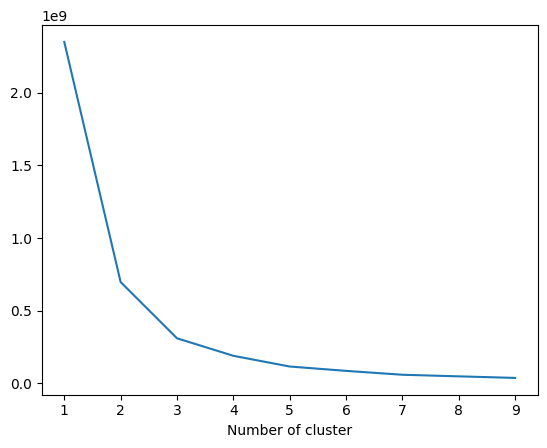

In [15]:
from sklearn.cluster import KMeans

sse = {}
olist_recency = olist_orders_recency[['last_order_day']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(olist_recency)
    olist_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [16]:
#Build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters =4)
olist_orders_recency['recency_cluster'] = kmeans.fit_predict(olist_orders_recency[['last_order_day']])


/var/folders/yt/4vlc63d57rz84q0w40rbc23w0000gn/T/ipykernel_95784/4210488046.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  olist_orders_recency['recency_cluster'] = kmeans.fit_predict(olist_orders_recency[['last_order_day']])


In [17]:
olist_orders_recency.head(10)

,customer_id,last_order_day,recency_cluster
0,9ef432eb6251297304e76186b10a928d,380,2
1,b0830fb4747a6c6d20dea0b8c802d7ef,84,3
2,41ce2a54c0b03bf3443c3d931a367089,70,3
3,f88197465ea7920adcdbec7375364d82,332,2
4,8ab97904e6daea8866dbdbc4fb7aad2c,245,1
5,503740e9ca751ccdda7ba28e9ab8f608,464,0
6,ed0271e0b7da060a393796590e7b737a,554,0
7,9bdf08b4b3b52b5526ff42d37d47f222,519,0
8,f54a9f0e6b351c431402b8461ea51999,631,0
9,31ad1d1b63eb9962463f764d4e6e0c9d,445,2


In [18]:
olist_orders_recency.groupby('recency_cluster')['last_order_day'].describe()

,count,mean,std,min,25%,50%,75%,max
recency_cluster,,,,,,,,
0,18150.0,533.953003,59.544192,449.0,487.0,525.0,576.0,772.0
1,28651.0,232.508115,35.052035,172.0,203.0,232.0,263.0,297.0
2,26299.0,363.518081,43.658739,298.0,325.0,357.0,400.0,448.0
3,26341.0,110.662693,36.078183,0.0,77.0,110.0,144.0,171.0


In [19]:
#reorder clusters so that cluster 3 is better than cluster 1 means that with cluster 1: the mean is longer than cluster 3
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [20]:
olist_orders_recency.head(5)

,customer_id,last_order_day,recency_cluster
0,9ef432eb6251297304e76186b10a928d,380,2
1,b0830fb4747a6c6d20dea0b8c802d7ef,84,3
2,41ce2a54c0b03bf3443c3d931a367089,70,3
3,f88197465ea7920adcdbec7375364d82,332,2
4,8ab97904e6daea8866dbdbc4fb7aad2c,245,1


In [21]:
olist_orders_recency_ordered = order_cluster('recency_cluster', 'last_order_day', olist_orders_recency, False)

In [22]:
olist_orders_recency_ordered.groupby('recency_cluster')['last_order_day'].describe()

,count,mean,std,min,25%,50%,75%,max
recency_cluster,,,,,,,,
0,18150.0,533.953003,59.544192,449.0,487.0,525.0,576.0,772.0
1,26299.0,363.518081,43.658739,298.0,325.0,357.0,400.0,448.0
2,28651.0,232.508115,35.052035,172.0,203.0,232.0,263.0,297.0
3,26341.0,110.662693,36.078183,0.0,77.0,110.0,144.0,171.0


# Frequency and User Clustering based on Frequency

In [23]:
total_orders = (olist_orders.groupby('customer_id').size().reset_index())
total_orders.columns = ['customer_id', 'total_order']

print(total_orders)


                            customer_id  total_order
0      00012a2ce6f8dcda20d059ce98491703            1
1      000161a058600d5901f007fab4c27140            1
2      0001fd6190edaaf884bcaf3d49edf079            1
3      0002414f95344307404f0ace7a26f1d5            1
4      000379cdec625522490c315e70c7a9fb            1
...                                 ...          ...
99436  fffecc9f79fd8c764f843e9951b11341            1
99437  fffeda5b6d849fbd39689bb92087f431            1
99438  ffff42319e9b2d713724ae527742af25            1
99439  ffffa3172527f765de70084a7e53aae8            1
99440  ffffe8b65bbe3087b653a978c870db99            1

[99441 rows x 2 columns]


In [24]:
total_orders.describe()

,total_order
count,99441.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


# Revenue and User Clustering based on Revenue

In [25]:
orders_payment_bycus = pd.merge(olist_orders_payment, olist_orders, on='order_id')

In [26]:
orders_payment_bycus.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_timestamp,last_order,last_order_day
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,2018-04-25 22:01:49,174 days 19:28:29,174
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,2018-06-26 11:01:38,113 days 06:28:40,113
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,2017-12-12 11:19:55,309 days 06:10:23,309
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,2017-12-06 12:04:06,315 days 05:26:12,315
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-05-21 16:14:41,2018-05-22 11:46:00,2018-06-01 21:44:53,2018-06-13 00:00:00,2018-05-21 13:59:17,149 days 03:31:01,149


In [27]:
olist_customers_revenue = orders_payment_bycus.groupby(['customer_id'], sort = True)['payment_value'].sum()


In [28]:
olist_customers_revenue = olist_customers_revenue.to_frame().reset_index()

In [29]:
print(type(olist_customers_revenue))

<class 'pandas.core.frame.DataFrame'>


In [30]:
olist_customers_revenue.columns = ['customer_id', 'revenue']

In [31]:
olist_customers_revenue.head(5)

,customer_id,revenue
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01


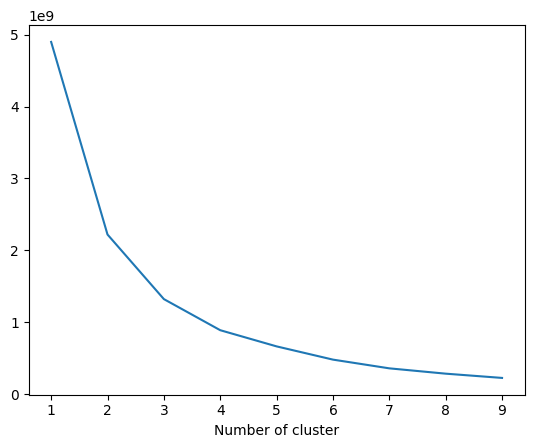

In [32]:
#clustering customer based on their revenue
from sklearn.cluster import KMeans

sse = {}
olist_revenue = olist_customers_revenue[['revenue']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(olist_revenue)
    olist_revenue["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

Take 4 las the number of clusters

In [33]:
olist_revenue.head()

,revenue,clusters
0,114.74,1
1,67.41,1
2,195.42,4
3,179.35,4
4,107.01,1


In [34]:
#apply clustering
kmeans = KMeans(n_clusters=4)
olist_customers_revenue['revenuecluster'] = kmeans.fit_predict(olist_customers_revenue[['revenue']])


In [35]:
print(olist_customers_revenue)

                            customer_id  revenue  revenuecluster
0      00012a2ce6f8dcda20d059ce98491703   114.74               0
1      000161a058600d5901f007fab4c27140    67.41               0
2      0001fd6190edaaf884bcaf3d49edf079   195.42               2
3      0002414f95344307404f0ace7a26f1d5   179.35               0
4      000379cdec625522490c315e70c7a9fb   107.01               0
...                                 ...      ...             ...
99435  fffecc9f79fd8c764f843e9951b11341    81.36               0
99436  fffeda5b6d849fbd39689bb92087f431    63.13               0
99437  ffff42319e9b2d713724ae527742af25   214.13               2
99438  ffffa3172527f765de70084a7e53aae8    45.50               0
99439  ffffe8b65bbe3087b653a978c870db99    18.37               0

[99440 rows x 3 columns]


In [36]:
olist_customers_revenue.groupby('revenuecluster')['revenue'].describe()


,count,mean,std,min,25%,50%,75%,max
revenuecluster,,,,,,,,
0,76874.0,90.195928,44.146355,0.00,53.610,83.125,123.4700,188.40
1,3138.0,845.699050,246.166775,565.91,647.540,769.035,983.2550,1544.62
2,19006.0,287.853609,90.690049,188.41,215.500,257.790,338.8375,565.83
3,422.0,2252.135166,968.227483,1549.41,1744.095,2023.580,2338.2100,13664.08


In [37]:
#reorder clusters so that cluster 3 is better than cluster 1 means that with cluster 1: the mean (revenue) is higher than the mean (revenue) of cluster 3
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [38]:
olist_orders_revenue_ordered = order_cluster('revenuecluster', 'revenue', olist_customers_revenue, True)

In [39]:
olist_orders_revenue_ordered.groupby('revenuecluster')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
revenuecluster,,,,,,,,
0,76874.0,90.195928,44.146355,0.00,53.610,83.125,123.4700,188.40
1,19006.0,287.853609,90.690049,188.41,215.500,257.790,338.8375,565.83
2,3138.0,845.699050,246.166775,565.91,647.540,769.035,983.2550,1544.62
3,422.0,2252.135166,968.227483,1549.41,1744.095,2023.580,2338.2100,13664.08


# RFM (Recency - Frequency - Monetary/Revenue Value) Clustering

In [40]:
#Calculate overall score and use mean() to see details
order_rfm = pd.merge(olist_orders_recency_ordered, olist_orders_revenue_ordered, on = 'customer_id')
order_rfm.head(5)

,customer_id,last_order_day,recency_cluster,revenue,revenuecluster
0,9ef432eb6251297304e76186b10a928d,380,1,38.71,0
1,f88197465ea7920adcdbec7375364d82,332,1,72.20,0
2,31ad1d1b63eb9962463f764d4e6e0c9d,445,1,169.76,0
3,059f7fc5719c7da6cbafe370971a8d70,330,1,29.75,0
4,7f8c8b9c2ae27bf3300f670c3d478be8,356,1,92.97,0


In [41]:
order_rfm['rfm_score'] = order_rfm['recency_cluster'] + order_rfm['revenuecluster']

In [42]:
order_rfm.groupby('rfm_score')[['last_order_day', 'revenue']].mean()

,last_order_day,revenue
rfm_score,,
0,533.095197,88.527273
1,388.421006,118.868541
2,262.552737,141.175078
3,145.163876,164.924321
4,131.776645,393.405097
5,125.404324,976.299059
6,110.036496,2337.372774


rfm_score = 0 is our worst customer, low active, low revenue. rfm_score = 8 is our beloved customer, high active and high revenue

In [43]:
order_rfm.head(10)

,customer_id,last_order_day,recency_cluster,revenue,revenuecluster,rfm_score
0,9ef432eb6251297304e76186b10a928d,380,1,38.71,0,1
1,f88197465ea7920adcdbec7375364d82,332,1,72.20,0,1
2,31ad1d1b63eb9962463f764d4e6e0c9d,445,1,169.76,0,1
3,059f7fc5719c7da6cbafe370971a8d70,330,1,29.75,0,1
4,7f8c8b9c2ae27bf3300f670c3d478be8,356,1,92.97,0,1
5,d2b091571da224a1b36412c18bc3bbfe,394,1,118.86,0,1
6,456dc10730fbdba34615447ea195d643,433,1,313.19,1,2
7,816f8653d5361cbf94e58c33f2502a5c,309,1,63.10,0,1
8,295ae9b35379e077273387ff64354b6f,442,1,43.00,0,1
9,c7340080e394356141681bd4c9b8fe31,326,1,356.12,1,2


# Customer Lifetime Value Prediction

In [44]:
orders_payment_bycus['purchase_timestamp'].describe()

count                           103886
mean     2017-12-29 21:48:47.671803648
min                2016-09-04 21:15:19
25%      2017-09-10 09:01:08.750000128
50%                2018-01-17 14:07:54
75%      2018-05-03 18:35:58.249999872
max                2018-10-17 17:30:18
Name: purchase_timestamp, dtype: object

In [45]:
#Calculate 6 months LTV for each customer (less than 180 days from last order day)
revenue_6m = orders_payment_bycus[orders_payment_bycus.last_order_day <= 180]

In [46]:
print(revenue_6m.describe())

       payment_sequential  payment_installments  payment_value  \
count        29444.000000          29444.000000   29444.000000   
mean             1.060624              2.762668     159.285056   
min              1.000000              0.000000       0.000000   
25%              1.000000              1.000000      58.280000   
50%              1.000000              1.000000     103.265000   
75%              1.000000              4.000000     174.962500   
max             14.000000             24.000000    7274.880000   
std              0.425425              2.587540     230.729721   

                  purchase_timestamp                   last_order  \
count                          29444                        29444   
mean   2018-06-23 16:18:51.971776768  116 days 01:11:26.028223066   
min              2018-04-19 17:33:04              0 days 00:00:00   
25%              2018-05-16 19:57:37             79 days 18:47:11   
50%              2018-06-23 23:37:24            115 days 17:

In [47]:
#Calculate 3 months LTV for each customer (less than 90 days from last order day)
revenue_3m = orders_payment_bycus[orders_payment_bycus.last_order_day <= 90]
print(revenue_3m.describe())

       payment_sequential  payment_installments  payment_value  \
count        10084.000000          10084.000000   10084.000000   
mean             1.043435              2.697937     156.048877   
min              1.000000              1.000000       0.000000   
25%              1.000000              1.000000      57.990000   
50%              1.000000              1.000000      99.435000   
75%              1.000000              4.000000     173.027500   
max              7.000000             20.000000    6922.210000   
std              0.298925              2.553949     229.244493   

                  purchase_timestamp                  last_order  \
count                          10084                       10084   
mean   2018-08-06 14:44:55.736215808  72 days 02:45:22.263784212   
min              2018-07-18 17:35:49             0 days 00:00:00   
25%    2018-07-28 21:50:46.249999872     63 days 08:36:04.250000   
50%              2018-08-06 15:06:19            72 days 02:23:59 

In [48]:
#calculate revenue and create a new dataframe for it
revenue_3m_bycus = revenue_3m.groupby(['customer_id'], sort = True)['payment_value'].sum()
#to_dataframe
revenue_3m_bycus = revenue_3m_bycus.to_frame().reset_index()
print(type(revenue_3m_bycus))


<class 'pandas.core.frame.DataFrame'>


In [49]:
revenue_3m_bycus.columns = ['customer_id', 'm3_revenue']
revenue_3m_bycus.head()

,customer_id,m3_revenue
0,000598caf2ef4117407665ac33275130,1255.71
1,001df1ee5c36767aa607001ab1a13a06,42.86
2,002554bdf9eb99618d8189c3a89fdd52,244.08
3,0026955706fd4e2fa997f3f4c18d485a,121.90
4,002905287304e28c0218389269b4759b,31.70


In [50]:
#calculate revenue and create a new dataframe for it
revenue_6m_bycus = revenue_6m.groupby(['customer_id'], sort = True)['payment_value'].sum()
#to_dataframe
revenue_6m_bycus = revenue_6m_bycus.to_frame().reset_index()
print(type(revenue_6m_bycus))


<class 'pandas.core.frame.DataFrame'>


In [51]:
revenue_6m_bycus.columns = ['customer_id', 'm6_revenue']
revenue_6m_bycus.head()

,customer_id,m6_revenue
0,000598caf2ef4117407665ac33275130,1255.71
1,0005aefbb696d34b3424dccd0a0e9fd0,147.33
2,001051abfcfdbed9f87b4266213a5df1,65.20
3,0013cd8e350a7cc76873441e431dd5ee,92.60
4,0015bc9fd2d5395446143e8b215d7c75,132.19


In [52]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [53]:
!pip install nbformat 


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [54]:
pip install ipykernel

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install --upgrade nbformat

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [56]:
import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

In [57]:
#plot LTV histogram
plot_3m_data = [
    go.Histogram(
        x=revenue_3m_bycus['m3_revenue']
    )
]

plot_layout = go.Layout(
        title='3m revenue'
    )
fig = go.Figure(data=plot_3m_data, layout=plot_layout)
pyoff.iplot(fig)

In [58]:
#plot LTV histogram
plot_6m_data = [
    go.Histogram(
        x=revenue_6m_bycus['m6_revenue']
    )
]

plot_layout = go.Layout(
        title='6m revenue'
    )
fig = go.Figure(data=plot_6m_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
#Feature Engineering (convert categorial columns to numerical)

In [ ]:
#Train split test

In [ ]:
#Machine Learning model for CLV prediction

In [ ]:
#Evaluation